# Reading The Data
-------------------------------------------

In [13]:
import pandas as pd
stroke_data = pd.read_csv('../Data/healthcare-dataset-stroke-data.csv')

# Exploring The Data
------------------------------------

### EXPLORING THE STRUCTRUE

 The dataset used in this project is contained in a single CSV file named healthcare-dataset-stroke-data.csv. It consists of 5110 rows and 12 columns, including both numerical and categorical attributes that describe patients’ demographic, lifestyle, and health-related information.

 After analyzing the dataset, we found that there are no duplicate records in the table. Among the numerical attributes, missing values were present only in the bmi column, while all other numerical columns were complete. For the categorical attributes, an inspection of the unique values in each column showed no inconsistencies or unexpected entries, indicating that the categorical data is clean and well-structured.



In [14]:
print('Dataset Information: ')
stroke_data.info()

print('\n========================================================================================')
print('Dataset Shape: ')
print(stroke_data.shape)

print('\n========================================================================================')
print('Dataset Columns: ')
print(stroke_data.columns)

print('\n========================================================================================')
print('Dataset Columns Data types: ')
print(stroke_data.dtypes)

print('\n========================================================================================')
print('Dataset Missing Values: ')
print(stroke_data.isna().sum())

print('\n========================================================================================')
print('Dataset Duplicate Rows: ')
print(stroke_data.duplicated().sum())

print('\n========================================================================================')
for column in stroke_data.select_dtypes(include='object'):
    print(f"\nColumn: {column}")
    print(stroke_data[column].unique())
    print('-'*50)

Dataset Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB

Dataset Shape: 
(5110, 12)

Dataset Columns: 
Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'w

##### DATA SAMPLES

In [15]:
print('Dataset Samples (head): ')
stroke_data.head()

Dataset Samples (head): 


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [16]:
print('Dataset Samples (tail): ')
stroke_data.tail()

Dataset Samples (tail): 


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


### EXPLORING THE STATISTICS

In [17]:
print('Dataset Description: ')
stroke_data.describe()

Dataset Description: 


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


##### Outlier Identification
  Outlier detection was performed to identify unusual data points that could influence the statistical analysis or affect the performance of predictive models. 

  However, not all numerical columns in the dataset are suitable for this analysis. Columns such as id, hypertension, heart_disease, and stroke contain identifiers or binary values (0 and 1), where outliers have no practical meaning. Therefore, we limited our examination to the three continuous variables: age, avg_glucose_level, and bmi.

  The Interquartile Range (IQR) method was applied to these columns to detect statistical outliers. This approach identifies values that lie below the first quartile (Q1) minus 1.5 times the IQR, or above the third quartile (Q3) plus 1.5 times the IQR. Boxplots were also generated to visually represent these outliers and their relation to stroke occurrence.

  From the visualizations, we observed that the avg_glucose_level and bmi features contained noticeable outliers, while age showed a more evenly distributed range of values. These detected outliers will be considered carefully in later stages, as they might represent true extreme cases rather than data entry errors.


Outlier count using the IQR method:

age: 0 outliers
avg_glucose_level: 627 outliers
bmi: 110 outliers


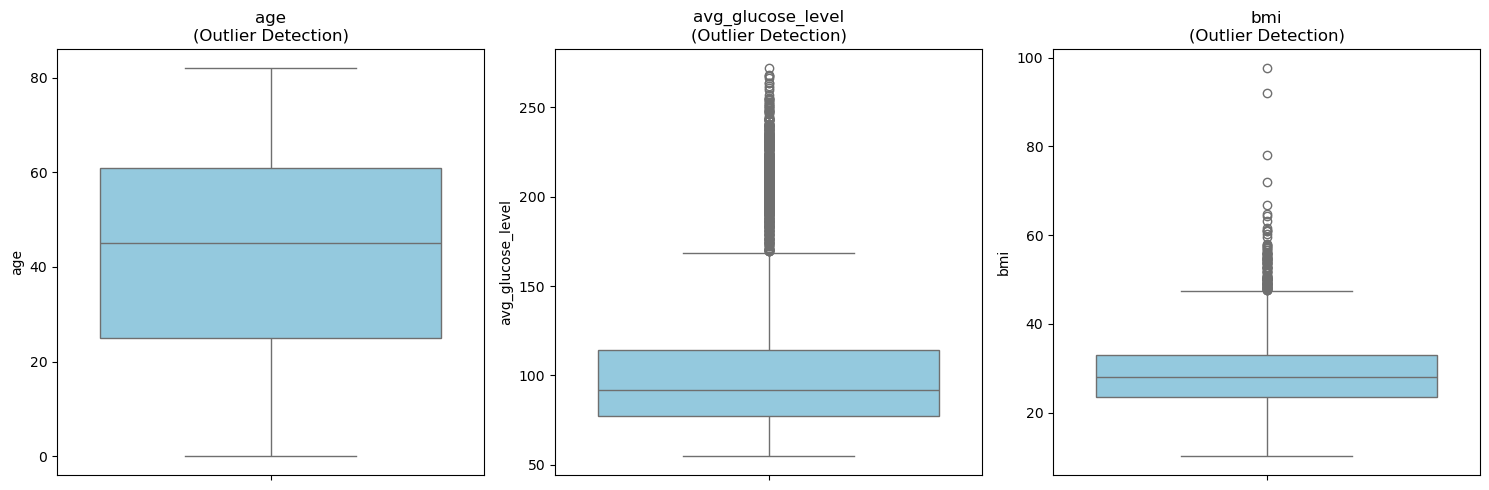

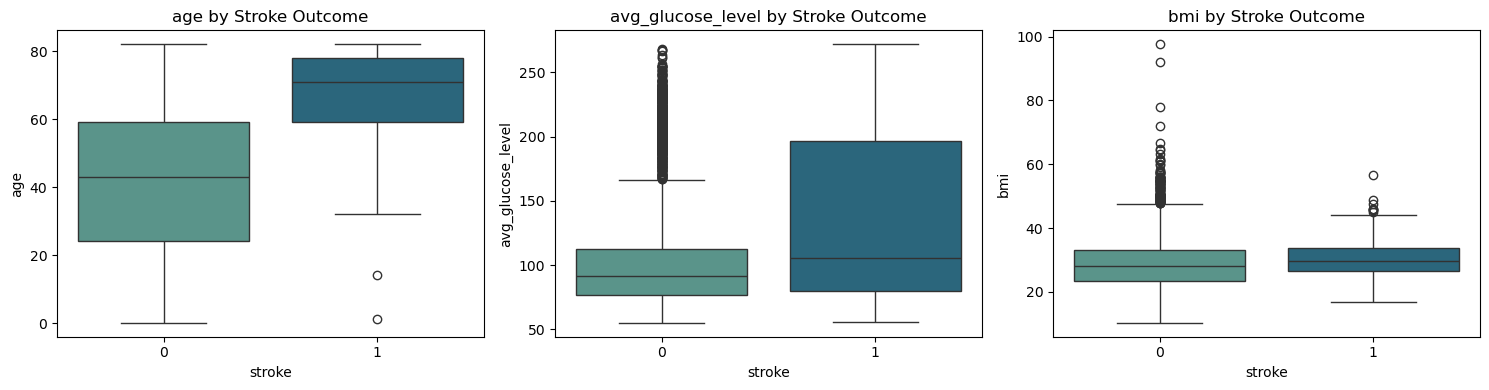

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the valid numeric columns for outlier detection
valid_numeric_cols = ['age', 'avg_glucose_level', 'bmi']


# STATISTICAL METHOD (IQR)
# ----------------------------------------------------------
print("Outlier count using the IQR method:\n")

for col in valid_numeric_cols:
    Q1 = stroke_data[col].quantile(0.25)
    Q3 = stroke_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = stroke_data[(stroke_data[col] < lower_bound) | (stroke_data[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")


# VISUAL METHOD (BOXPLOTS)
# ----------------------------------------------------------
plt.figure(figsize=(15, 5))
for i, col in enumerate(valid_numeric_cols, 1):
    plt.subplot(1, len(valid_numeric_cols), i)
    sns.boxplot(y=stroke_data[col], color='skyblue')
    plt.title(f"{col}\n(Outlier Detection)")
plt.tight_layout()
plt.show()


# VISUALIZE OUTLIERS BY STROKE OUTCOME
# ----------------------------------------------------------
plt.figure(figsize=(15, 4))
for i, col in enumerate(valid_numeric_cols, 1):
    plt.subplot(1, len(valid_numeric_cols), i)
    sns.boxplot(
        x='stroke',
        y=col,
        data=stroke_data,
        hue='stroke',
        palette='crest',
        legend=False
    )
    plt.title(f"{col} by Stroke Outcome")
plt.tight_layout()
plt.show()




##### Identifying Key Features

Before performing correlation analysis, the categorical attributes were label-encoded to make them numerically comparable with the target column. This straightforward encoding approach was sufficient for our purpose of gaining an initial understanding of the dataset, without delving into more complex statistical tests such as chi-square analysis.

After encoding, we computed the correlation of each feature with the target variable (stroke). The analysis revealed that age, heart_disease, avg_glucose_level, hypertension, and ever_married have the highest positive correlations with stroke occurrence. Among them, age shows the strongest correlation (≈0.25), followed by heart_disease (≈0.13) and avg_glucose_level (≈0.13).

These results align well with domain logic and medical intuition: older individuals are naturally at higher risk, and conditions such as heart disease, hypertension, and elevated glucose levels are medically recognized as major risk factors for stroke. Even the correlation with marital status may reflect lifestyle or stress-related influences observed in healthcare studies.

A bar chart was used to visualize the top five features most correlated with stroke, offering a clear view of the strongest predictors that are likely to play a key role in building the model.

Correlation of all features with 'stroke':

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
ever_married         0.108340
bmi                  0.042374
smoking_status       0.028123
Residence_type       0.015458
gender               0.008929
id                   0.006388
work_type           -0.032316
Name: stroke, dtype: float64


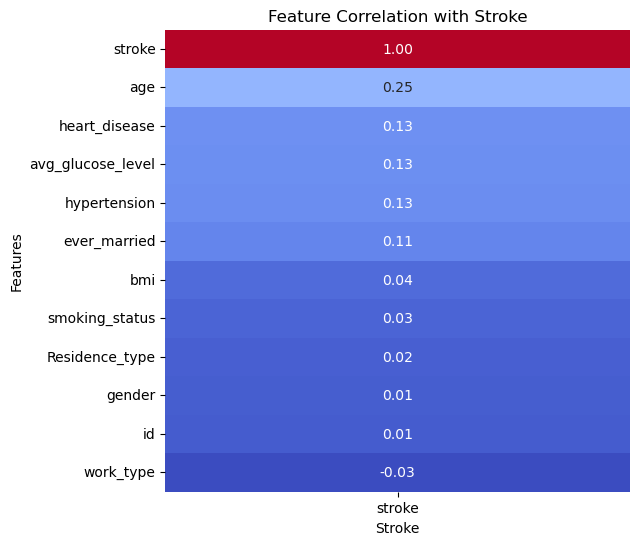

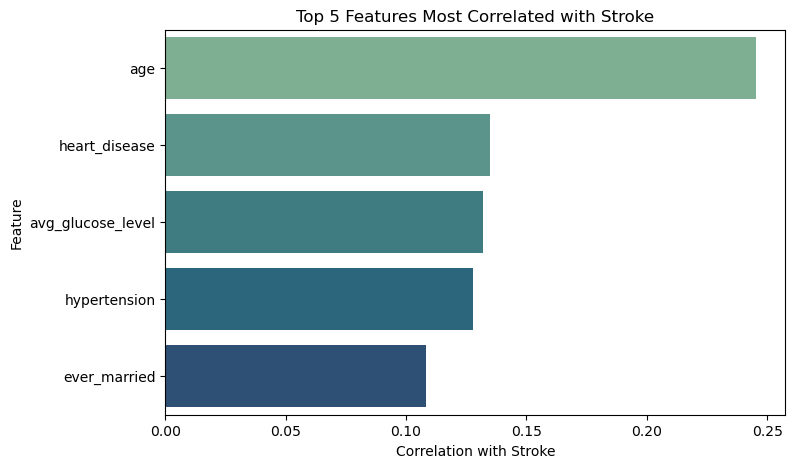

In [19]:
from sklearn.preprocessing import LabelEncoder

# Make a copy to preserve the original data
stroke_data_encoded = stroke_data.copy()

# ----------------------------------------
# ENCODE CATEGORICAL FEATURES
# ----------------------------------------
encoder = LabelEncoder()
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in categorical_cols:
    stroke_data_encoded[col] = encoder.fit_transform(stroke_data_encoded[col].astype(str))

# ----------------------------------------
# COMPUTE CORRELATION WITH TARGET
# ----------------------------------------
corr_matrix = stroke_data_encoded.corr()
corr_with_stroke = corr_matrix['stroke'].sort_values(ascending=False)

print("Correlation of all features with 'stroke':\n")
print(corr_with_stroke)

# ----------------------------------------
# VISUALIZE CORRELATION WITH TARGET ONLY
# ----------------------------------------
plt.figure(figsize=(6, 6))
sns.heatmap(corr_with_stroke.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title("Feature Correlation with Stroke")
plt.xlabel("Stroke")
plt.ylabel("Features")
plt.show()

# ----------------------------------------
# VISUALIZE TOP 5 FEATURES
# ----------------------------------------
top_features = corr_with_stroke.drop('stroke').head(5)

plt.figure(figsize=(8,5))
sns.barplot(
    x=top_features.values,
    y=top_features.index,
    hue=top_features.index,
    palette='crest',
    legend=False
)
plt.title("Top 5 Features Most Correlated with Stroke")
plt.xlabel("Correlation with Stroke")
plt.ylabel("Feature")
plt.show()




##### DISTRIBUTION OF HEALTH-RELATED DATA POINTS
To better understand the composition of the dataset and the characteristics of the population, we examined the distribution of both numerical and categorical attributes. This helps reveal how the health and lifestyle factors are spread, detect imbalances among categories, and identify patterns that may influence stroke risk.

We analyzed the numerical health indicators — age, avg_glucose_level, and bmi — using histograms with kernel density estimates (KDE).
The distributions show that:

Age is right-skewed, with most individuals being middle-aged or older, which aligns with the known higher stroke risk in older populations.

Average glucose level also exhibits a right-skewed distribution, indicating that some patients have considerably higher glucose levels, possibly reflecting diabetic conditions.

BMI values roughly follow a normal-like distribution, centered around the healthy-to-overweight range.

For the categorical attributes — gender, ever_married, work_type, Residence_type, and smoking_status — we visualized their frequency using count plots. The dataset appears reasonably balanced across most variables, though some categories (like “Private” work type) are more frequent. Such patterns help contextualize the population characteristics before building predictive models.

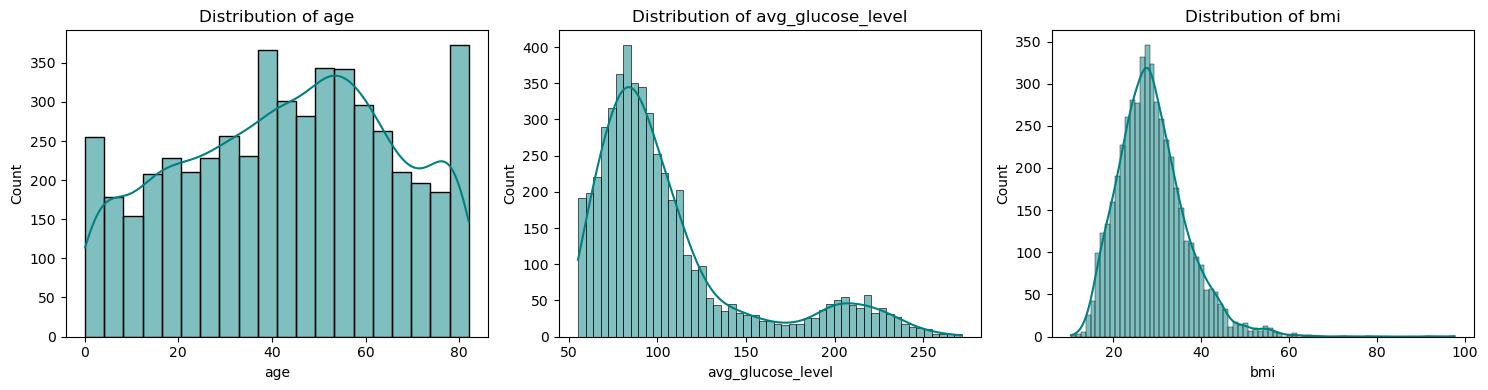

In [20]:
# Numeric
numeric_cols = ['age', 'avg_glucose_level', 'bmi']

plt.figure(figsize=(15, 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.histplot(stroke_data[col], kde=True, color='teal')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

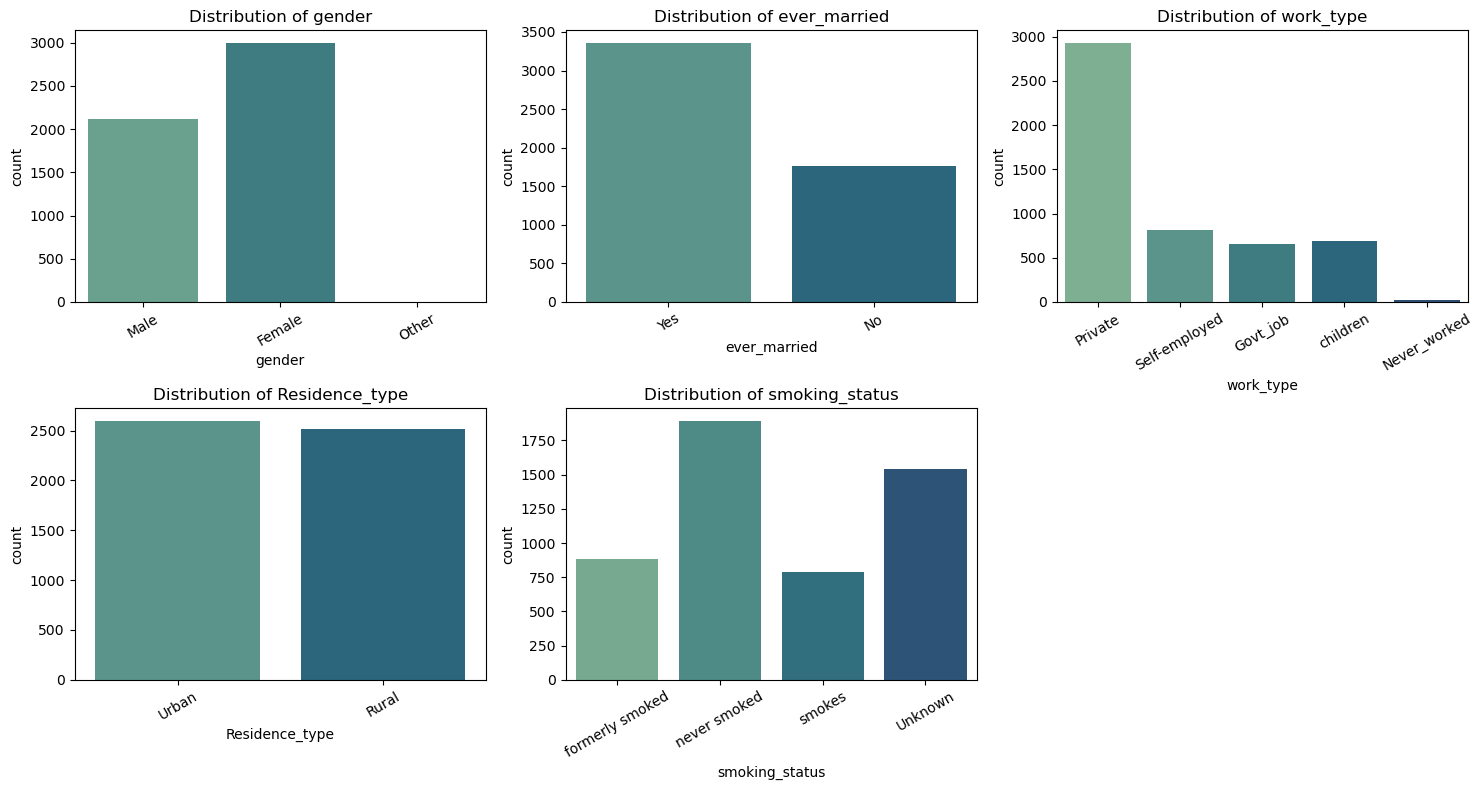

In [21]:
# Categorical
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

plt.figure(figsize=(15, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(
        x=col,
        data=stroke_data,
        hue=col,
        palette='crest',
        legend=False
    )
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


##### POTENTIAL PATTERNS

To explore possible relationships within the data, we examined how certain health and lifestyle factors vary between individuals who experienced a stroke and those who did not. The focus was on age, average glucose level, and smoking status, as these are commonly associated with stroke risk.

The visualizations suggest a clear upward trend between age and stroke occurrence, indicating that the likelihood of stroke tends to rise with increasing age. This observation aligns with well-known medical patterns where older adults face higher risks.

We also noticed that higher glucose levels appear more frequently among stroke cases, implying that blood sugar regulation could be an influential factor.

For smoking status, the relationship was less distinct, though the plot still helps highlight possible lifestyle effects worth exploring further.

These initial visual patterns do not imply causation but serve as valuable hints when deciding which features to prioritize for predictive modeling in later stages.

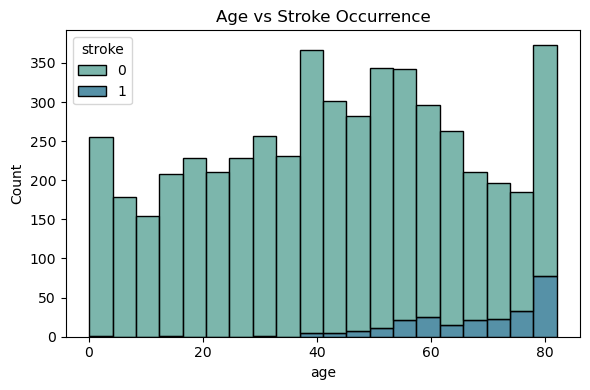

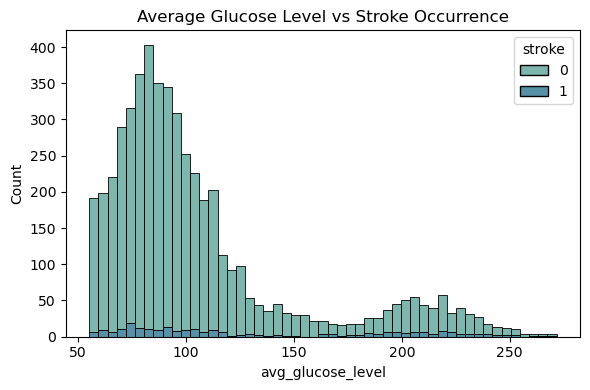

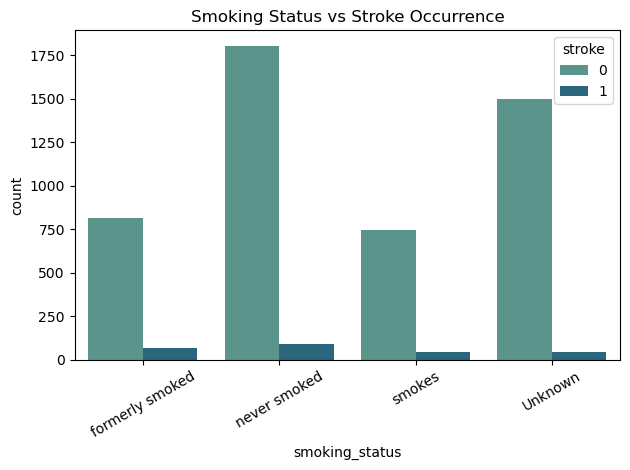

In [22]:
# Does stroke risk rise with age?
plt.figure(figsize=(6,4))
sns.histplot(
    data=stroke_data,
    x='age',
    hue='stroke',
    multiple='stack',
    palette='crest'
)
plt.title("Age vs Stroke Occurrence")
plt.tight_layout()
plt.show()

# Is high glucose linked to stroke?
plt.figure(figsize=(6,4))
sns.histplot(
    data=stroke_data,
    x='avg_glucose_level',
    hue='stroke',
    multiple='stack',
    palette='crest'
)
plt.title("Average Glucose Level vs Stroke Occurrence")
plt.tight_layout()
plt.show()

# Is smoking or work type related to stroke?
sns.countplot(
    x='smoking_status',
    hue='stroke',
    data=stroke_data,
    palette='crest'
)
plt.title("Smoking Status vs Stroke Occurrence")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Cleaning The Data
---------------------------------------

##### DEALING WITH MISSING VALUES
The dataset contained missing values exclusively in the BMI column (approximately 201 records). Since removing these entries would result in unnecessary data loss, we applied mean imputation to fill the missing values. The mean was chosen as it provides a straightforward estimate of the central tendency and helps maintain the overall balance of BMI values in the dataset.

This approach ensures that the distribution of BMI remains consistent with the original data while preserving all patient records for later analysis. After imputation, no missing values remained in the dataset, confirming that it is now complete and ready for subsequent preprocessing steps such as outlier handling, standardization, and encoding.

In [23]:
# Check mean BMI
mean_bmi = stroke_data['bmi'].mean()
print("Mean BMI:", mean_bmi)

# Fill missing BMI values
stroke_data['bmi'] = stroke_data['bmi'].fillna(mean_bmi)

# Verify no missing values remain
stroke_data.isna().sum()

Mean BMI: 28.893236911794666


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

##### DEALING WITH OUTLIERS
Outlier analysis revealed extreme values in the average glucose level and BMI features, which are common in healthcare data due to natural variations among patients. Binary variables such as hypertension and heart_disease were initially identified by the IQR method but were excluded from treatment since they contain only 0 and 1 values.

To prevent extreme numerical values from exerting excessive influence on the model while preserving clinical relevance, the continuous features were treated using IQR-based capping. Values beyond the upper or lower limits were replaced with the nearest valid threshold.

This method maintains the integrity of the data and ensures a more balanced distribution, providing a solid foundation for later modeling steps.

In [24]:
# Check the extreme values for glucose and BMI
print("Glucose Range:", stroke_data['avg_glucose_level'].min(), "to", stroke_data['avg_glucose_level'].max())
print("BMI Range:", stroke_data['bmi'].min(), "to", stroke_data['bmi'].max())

Glucose Range: 55.12 to 271.74
BMI Range: 10.3 to 97.6


In [25]:
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower_bound, upper_bound)

# Apply capping only to relevant columns
cap_outliers(stroke_data, 'avg_glucose_level')
cap_outliers(stroke_data, 'bmi')

# Verify
stroke_data[['avg_glucose_level', 'bmi']].describe()


,avg_glucose_level,bmi
count,5110.000000,5110.000000
mean,100.996204,28.721613
std,33.214738,7.119940
min,55.120000,10.300000
25%,77.245000,23.800000
50%,91.885000,28.400000
75%,114.090000,32.800000
max,169.357500,46.300000


##### STANDARDIZATION
To ensure comparability among features and improve model performance, all continuous variables — age, average glucose level, and BMI — were standardized using the Z-score normalization technique. This transformation rescales values to have a mean of 0 and a standard deviation of 1, ensuring that each variable contributes equally to model training.

Standardization was chosen over simple normalization because the distributions of these health-related features are approximately bell-shaped and contain outliers, which are more effectively managed under a standardized scale. This process enhances numerical stability and prepares the dataset for reliable and efficient learning in subsequent modeling stages.

In [26]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns to scale
numeric_features = ['age', 'avg_glucose_level', 'bmi']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
stroke_data[numeric_features] = scaler.fit_transform(stroke_data[numeric_features])

# Verify results
stroke_data[numeric_features].describe().T


,count,mean,std,min,25%,50%,75%,max
age,5110.0,5.005781e-17,1.000098,-1.908261,-0.806115,0.078432,0.786070,1.714845
avg_glucose_level,5110.0,-3.392807e-16,1.000098,-1.381335,-0.715150,-0.274339,0.394255,2.058363
bmi,5110.0,1.668594e-17,1.000098,-2.587580,-0.691311,-0.045175,0.572868,2.469137


##### ENCODING
Categorical variables were kept unencoded since the focus at this stage is on exploratory analysis and data understanding. We chose to retain their original textual form to maintain interpretability during visualizations and statistical exploration.

This approach enables clearer insights into the relationships between health-related factors and stroke occurrence. Encoding (such as label or one-hot encoding) will be applied later — at the end of Milestone 2, once all analysis is complete and the dataset is prepared for machine learning — to ensure both computational efficiency and numerical compatibility with predictive algorithms.

##### EXPORT THE CLEANED DATASET

In [27]:
stroke_data.to_csv('../Data/stroke_data_cleaned.csv', index=False)